In [1]:
%%html
<script>
(function() {
  // Create the toggle button
  const rtlButton = document.createElement("button");
  rtlButton.textContent = "Toggle LTR";
  rtlButton.id = "top-rtl-toggle";
  rtlButton.style.marginLeft = "8px";
  rtlButton.style.padding = "4px 10px";
  rtlButton.style.fontSize = "14px";
  rtlButton.style.cursor = "pointer";

  // State
  var rtlActive = false;

  // Styling function
  var applyStyleToEditor = (editor) => {
    if (!editor) return;
    var direction = getComputedStyle(editor).getPropertyValue('direction')=='rtl' ? 'ltr' : 'rtl';
    var text_align = getComputedStyle(editor).getPropertyValue('text-align')=='right' ? 'left' : 'right';
    editor.style.setProperty('direction', direction, 'important');
    editor.style.setProperty('text-align', text_align, 'important');
  };

  // Toggle logic
  rtlButton.onclick = () => {
    rtlActive = !rtlActive;
    rtlButton.textContent = rtlActive ? "Toggle LTR" : "Toggle RTL";
    document.querySelectorAll('.jp-MarkdownCell .jp-InputArea-editor').forEach(applyStyleToEditor);
    document.querySelectorAll('.jp-RenderedHTMLCommon code, .jp-RenderedHTMLCommon code span').forEach(applyStyleToEditor);
    document.querySelectorAll('jp-RenderedHTMLCommon, .jp-RenderedHTMLCommon *').forEach(applyStyleToEditor);
  };

  // Watch for focus into editing Markdown cells
  // document.addEventListener('focusin', (event) => {
  //   const editor = event.target.closest('.jp-MarkdownCell .jp-InputArea-editor');
  //    if (editor) applyStyleToEditor(editor);
  // });

  // Insert into top toolbar if not already present
  var insertIntoToolbar = () => {
    const toolbar = document.querySelector('.jp-NotebookPanel-toolbar');
    if (toolbar && !document.getElementById("top-rtl-toggle")) {
      toolbar.appendChild(rtlButton);
    } else {
      // Try again in a moment if toolbar isn't ready yet
      setTimeout(insertIntoToolbar, 300);
    }
  };

  insertIntoToolbar();
})();
</script>

In [2]:
%%html
<!-- <style>
  table {display: inline-block}
</style> -->

## Matplotlib 
זוהי ספרייה פופולרית להצגת גרפים וויזואליזציות בפייתון.  
היא מאפשרת ליצור תרשימים דו־ממדיים כמו גרפים קוויים, עמודות, פיזור (scatter), תרשימי חום (heatmaps) ועוד.  
עבור פיזיקאים ומתמטיקאים, היא כלי חיוני להצגת נתונים, תוצאות ניסוי וסימולציות בצורה ברורה.  
המודול הנפוץ ביותר לשימוש הוא `matplotlib.pyplot` שמספק פקודות פשוטות לשרטוט מהיר.

## אנטומיית תרשימים
**מושגים מרכזיים:**  
- **Figure** — מכלול התרשים (הדף).  
- **Axes** — מערכת צירים אחת (או יותר) בתוך ה־Figure.  
- **Axis** — ציר $x$ או $y$ בתוך ה־Axes.

יש שתי דרכים עיקריות לעבוד:  
1. **סגנון Pyplot** (מהיר): `(...)plt.plot`, ואז `()plt.show`  
2. **מודל אובייקטי (מומלץ לפרויקטים)**: יצירת `()fig, ax = plt.subplots` ואז שימוש ב־`(...)ax.plot` וכן הלאה.

נוסיף כותרות, תוויות, ונטמיע נוסחאות עם $ \LaTeX $ בכותרת/צירים. ראשית, נייבא את הספרייה ונאתחל פרמטרים

In [3]:
# Core imports used across the notebook
import numpy as np
import matplotlib.pyplot as plt

# Global plotting defaults (feel free to tweak)
plt.rcParams.update({
    "figure.figsize": (7, 4.5),
    "figure.dpi": 120,
    "axes.grid": True,
    "font.size": 11
})


### שימוש במודל האובייקטי של matplotlib

בדוגמה זו נשתמש בשיטה האובייקטית של matplotlib ליצירת גרף פשוט:  
- נבנה מערך ערכים $x$ בתחום $[0, 2\pi]$.  
- נחשב את $y = \sin(x)$.  
- נשרטט את הגרף של פונקציית הסינוס עם כותרת, שמות לצירים ו־Legend.

```{note}
השיטה האובייקטית, `()fig, ax = plt.subplots` מאפשרת שליטה נוחה על כל מרכיבי התרשים, ולכן מומלצת לשימוש בפרויקטים מסודרים.
```

### דוגמה: גרף פשוט של הפונקציה $\sin(x)$:

1. **יצירת נתונים**  
   - `x = np.linspace(0, 2*np.pi, 200)` יוצר 200 נקודות מ־0 עד $2\pi$ (רדיונים).  
   - `y = np.sin(x)` מחשב את ערכי הסינוס עבור כל נקודה.

2. **הגדרת תרשים**  
   - `()fig, ax = plt.subplots` יוצר פיגורה (`fig`) וציר (`ax`) לעבודה.

3. **ציור הגרף**  
   - `ax.plot(x, y, label="sin(x)")` מצייר את $y=\sin(x)$ עם תווית למקרא.

4. **כותרות ותוויות**  
   - `ax.set_title(r"$y=\sin(x)$")` מוסיף כותרת עם נוסחת LaTeX.  
   - `ax.set_xlabel(r"$x$ (rad)")` ו־`ax.set_ylabel(r"$y$")` מוסיפים שמות לצירים, כולל יחידות ברדיאנים.

5. **מקרא**  
   - `()ax.legend` מציג את המקרא עם התווית שהוגדרה.

6. **פריסה ותצוגה**  
   - `()plt.tight_layout` דואג שאין חפיפות בין רכיבי התרשים.  
   - `()plt.show` מציג את התרשים על המסך.

בקצרה: הקוד מייצר תרשים של הפונקציה $\sin(x)$ בין $0$ ל־$2\pi$, עם כותרות, יחידות ומקרא.


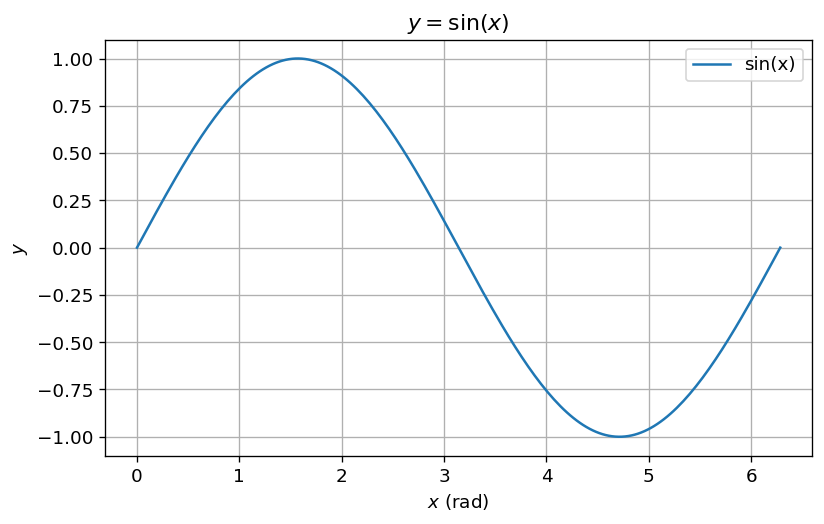

In [4]:
x = np.linspace(0, 2*np.pi, 200)
y = np.sin(x)

fig, ax = plt.subplots()
ax.plot(x, y, label="sin(x)")
ax.set_title(r"$y=\sin(x)$")
ax.set_xlabel(r"$x$ (rad)")
ax.set_ylabel(r"$y$")
ax.legend()
plt.tight_layout()
plt.show()

### גודל תרשים, DPI, פריסה ושמירה

בתרשים זה נמחיש כיצד לשלוט בפרמטרים חשובים של Figure:  
- `figsize` — קובע את גודל התרשים באינצ'ים.  
- `dpi` — רזולוציית התצוגה (נקודות לאינץ').  
- `constrained_layout=True` — מאפשר התאמה אוטומטית של פריסת האלמנטים (כותרות, תוויות) כך שלא ייחתכו.  
- `(...)fig.savefig` — שמירת התרשים כקובץ (למשל PDF איכותי להדפסה, או PNG למסך).

בדוגמה נצייר את פונקציית הקוסינוס, נוסיף כותרת, שמות לצירים ו־Legend, ונראה כיצד ניתן לשמור את הגרף באיכות המתאימה לפרסום.


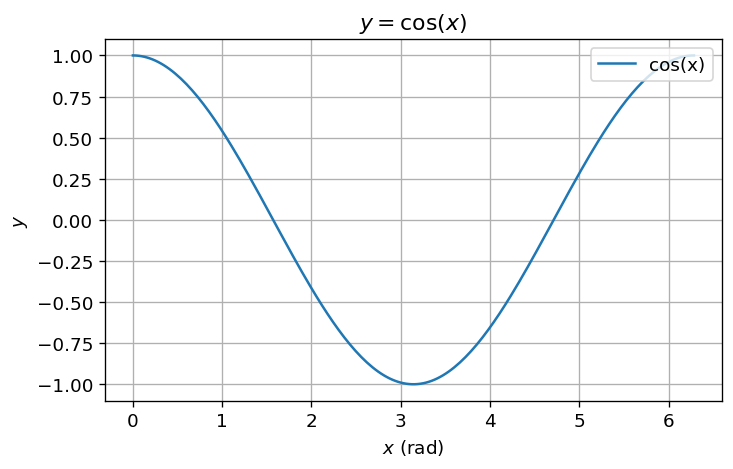

In [5]:
# Figure size, dpi, layout, and saving
fig, ax = plt.subplots(figsize=(6, 3.8), constrained_layout=True)
ax.plot(x, np.cos(x), label="cos(x)")
ax.set_title(r"$y=\cos(x)$")
ax.set_xlabel(r"$x$ (rad)")
ax.set_ylabel(r"$y$")
ax.legend(loc="upper right")

# Uncomment to save a publication-quality figure:
# fig.savefig("cosine_plot.pdf")  # vector format (great for print)
plt.show()


### שימוש ב־`axs` לציורים מרובים

כאשר רוצים לצייר כמה תתי תרשימים שונים, נוח להשתמש ב־`plt.subplots(rows, cols)` שמחזיר:
- אובייקט figure (`fig`).
- מערך דו־ממדי של צירים (`axs`) בגודל שנבחר.

כך, אפשר לגשת לכל ציר לפי המיקום שלו במערך `axs[row, col]` ולצייר בו גרף עצמאי עם כותרת, תוויות וכו'.  
בדרך זו ניתן לארגן מספר גרפים מסודרים בטבלה אחת (grid) ולשלוט בכל אחד מהם בנפרד.

לדוגמה בקוד שלמטה: `fig, axs = plt.subplots(2, 3, ...)` יוצר **רשת של 2 שורות ו־3 עמודות** של תרשימים.  
לאחר מכן ניגשים לכל אחד מהם (`axs[0,0]`, `axs[0,1]`, ... `axs[1,2]`) ומציירים בו סוג גרף אחר.


### סוגי גרפים ב־Matplotlib

בקטע הבא נמחיש כמה סוגי גרפים נפוצים: קו (line), פיזור (scatter), היסטוגרמה (hist), הדמיה עם imshow (כמו heatmap), וגרף עם שגיאות (errorbar).  
לכל סוג גרף מתאימה קריאה שונה לפונקציה, בהתאם לאופי הנתונים שרוצים להציג.

#### Line plot
גרף קווים – מיועד להצגת פונקציה רציפה או קו מגמה לאורך טווח.  
בדוגמה מוצג קו ישר "אמיתי" לצד נקודות ניסוי עם רעש.  
**קריאה לפונקציה:** `ax.plot(x, y, ...)`  
הפונקציה מחברת את הנקודות לפי סדרן ומאפשרת לקבוע סגנון קו, צבע ותווית.

#### Scatter plot
תרשים פיזור – מתאים להצגת נקודות בודדות ללא חיבור ביניהן בקווים.  
שימושי במיוחד להצגת מדידות ניסיוניות או קשר בין שני משתנים.  
**קריאה לפונקציה:** `ax.scatter(x, y, ...)`  
ניתן לשנות צבע, גודל וסגנון של הנקודות, ואף לקודד מידע נוסף באמצעות צבעים וגדלים שונים.

#### Histogram
היסטוגרמה – מציגה את ההתפלגות של מדגם נתונים.  
בדוגמה מוצגת התפלגות שנדגמה מהתפלגות נורמלית.  
**קריאה לפונקציה:** `ax.hist(data, bins=..., ...)`  
אפשר לשלוט במספר התאים (bins), לבקש נורמליזציה (`density=True`), ולשנות צבע או שקיפות.

#### Imshow
הצגת מערך דו־ממדי כ"תמונה" או heatmap, כך שכל ערך מוצג בצבע שונה.  
בדוגמה מוצג שדה גאוסי דו־ממדי.  
**קריאה לפונקציה:** `ax.imshow(Z, extent=[...], origin='lower', aspect='auto')`  
הפונקציה מציירת מטריצה כגרפיקת פיקסלים. לרוב מוסיפים סרגל צבעים עם `fig.colorbar(...)` כדי להבין את סקאלת הערכים.

#### Errorbar
גרף עם פסי שגיאה – מיועד להצגת מדידות עם אי־ודאות.  
בדוגמה מוצגות נקודות עם פסי שגיאה אקראיים סביבן.  
**קריאה לפונקציה:** `ax.errorbar(x, y, yerr=..., fmt='o')`  
ניתן להציג שגיאות בציר $y$ (או $x$), לקבוע סגנון נקודות/קווים ולהתאים צבעים.


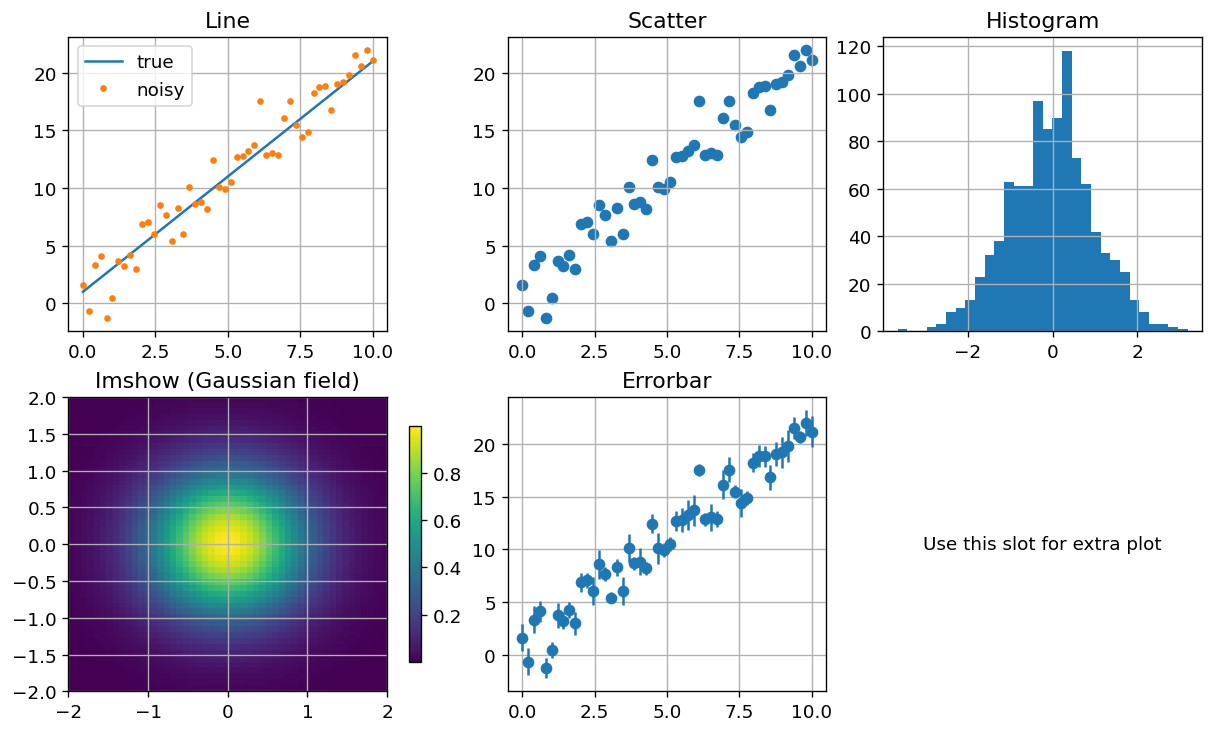

In [6]:
# Data generation
rng = np.random.default_rng(42)
x = np.linspace(0, 10, 50)
y_true = 2.0 * x + 1.0
y_noisy = y_true + rng.normal(0, 2.0, size=x.size)

fig, axs = plt.subplots(2, 3, figsize=(10, 6), constrained_layout=True)

# Line
axs[0,0].plot(x, y_true, label="true")
axs[0,0].plot(x, y_noisy, ".", label="noisy")
axs[0,0].set_title("Line")
axs[0,0].legend()

# Scatter
axs[0,1].scatter(x, y_noisy)
axs[0,1].set_title("Scatter")

# Histogram
data = rng.normal(loc=0.0, scale=1.0, size=1000)
axs[0,2].hist(data, bins=30)
axs[0,2].set_title("Histogram")

# Imshow (heatmap-like)
grid_x = np.linspace(-2, 2, 50)
grid_y = np.linspace(-2, 2, 50)
X, Y = np.meshgrid(grid_x, grid_y)
Z = np.exp(-(X**2 + Y**2))
im = axs[1,0].imshow(Z, extent=[grid_x.min(), grid_x.max(), grid_y.min(), grid_y.max()],
                     origin="lower", aspect="auto")
axs[1,0].set_title("Imshow (Gaussian field)")
fig.colorbar(im, ax=axs[1,0], shrink=0.8)

# Errorbar
yerr = rng.uniform(0.5, 1.5, size=x.size)
axs[1,1].errorbar(x, y_noisy, yerr=yerr, fmt="o")
axs[1,1].set_title("Errorbar")

# Empty slot for future (e.g., bar or boxplot)
axs[1,2].text(0.5, 0.5, "Use this slot for extra plot", ha="center", va="center")
axs[1,2].set_axis_off()

plt.show()


## התאמות מתקדמות  
מעבר ליכולות הבסיסיות של Matplotlib, קיימות פונקציות מתקדמות שמאפשרות להציג נתונים בצורה מדעית מדויקת וברורה יותר. שימוש נכון בהן חשוב במיוחד בפיזיקה, שבה לעיתים קרובות נדרשים להציג תופעות המתפרשות על פני **סדרי גודל רבים** או לשלב **יחידות שונות** על אותו תרשים.  

- **סולמות לוגריתמיים**: `ax.set_xscale('log')`, `ax.set_yscale('log')` — מאפשרים להציג נתונים המשתנים באקספוננט או על פני כמה סדרי גודל, כמו דעיכה רדיואקטיבית או ספקטרום תדרים. שימוש נכון בסולם לוגריתמי יכול להפוך עקומה לא ליניארית לקו ישר, ולחשוף קשרים חבויים.  
- **טיקים ותוויות**: מאפשרים שליטה מלאה באופן הצגת המספרים בצירים (מדעי, אקספוננציאלי או רגיל), וכן הוספת **יחידות פיזיקליות** לכותרות הצירים. התאמות אלו מבטיחות שהגרף יהיה קריא ונכון גם לקהל מדעי.  
- **מקרא ו־annotations**: הוספת מקרא (legend) חיונית כשיש כמה עקומות באותו גרף. בעזרת `ax.annotate` ניתן גם להדגיש נקודות קריטיות בנתונים (כמו מקסימום, חצי־חיים או תדר תהודה), ולהסביר אותן באמצעות חצים וטקסט.  
- **ציר תאום**: `()ax.twinx` או `()ax.twiny` מאפשרים להציג שתי סקאלות יחידות שונות באותו תרשים (למשל טמפרטורה ב־K וב־°C, או תדר לעומת אורך גל), מבלי לבלבל את הקורא.  
- **Colormaps**: שימוש במפות צבעים מדעיות (כמו `viridis` או `inferno`) מאפשר קידוד של פרמטר נוסף באמצעות צבע. זה חשוב במיוחד להצגת סדרות של ניסויים או סימולציות, תוך שמירה על נגישות גם לעיוורי צבעים.  

```{note} 
ביחד, התאמות אלו מאפשרות לא רק ליצור גרף יפה יותר, אלא להעביר מסר פיזיקלי ברור ומדויק, ולחסוך לקורא את הצורך בניחושים או חישובים נוספים.  
```
